In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 10
from sklearn.metrics import classification_report, average_precision_score, mean_squared_error

In [23]:
dataset = pd.read_csv("NYweather.csv", index_col = 'date')
dataset.head()

,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
date,,,,,,
1-1-2016,42,34,38.0,0.00,0.0,0
2-1-2016,40,32,36.0,0.00,0.0,0
3-1-2016,45,35,40.0,0.00,0.0,0
4-1-2016,36,14,25.0,0.00,0.0,0
5-1-2016,29,11,20.0,0.00,0.0,0


In [24]:
dataset.index = pd.to_datetime(dataset.index)
dataset.head()

,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
date,,,,,,
2016-01-01,42,34,38.0,0.00,0.0,0
2016-02-01,40,32,36.0,0.00,0.0,0
2016-03-01,45,35,40.0,0.00,0.0,0
2016-04-01,36,14,25.0,0.00,0.0,0
2016-05-01,29,11,20.0,0.00,0.0,0


In [25]:
train, test = train_test_split(dataset, test_size = 0.2)
train = train.sort_index()
test = test.sort_index()
train.head()

,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
date,,,,,,
2016-01-01,42,34,38.0,0.00,0.0,0
2016-01-03,52,39,45.5,0.00,0.0,0
2016-01-04,79,61,70.0,0.02,0.0,0
2016-01-05,51,45,48.0,0.16,0.0,0
2016-01-06,83,66,74.5,0.00,0.0,0


Text(0.5,1,'Daily Trends')

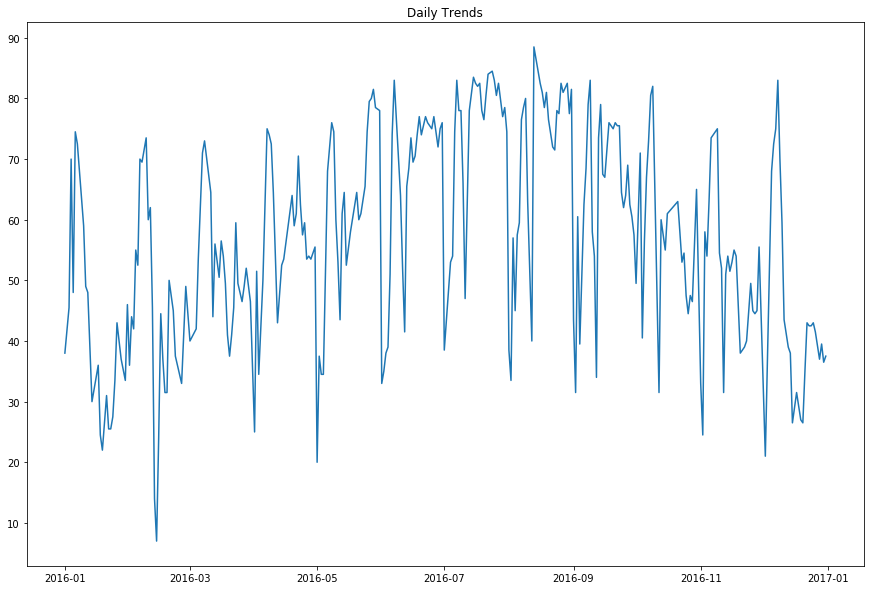

In [26]:
temp = train['average temperature']
plt.plot(temp)
plt.title("Daily Trends")

Text(0.5,1,'Weekly trends')

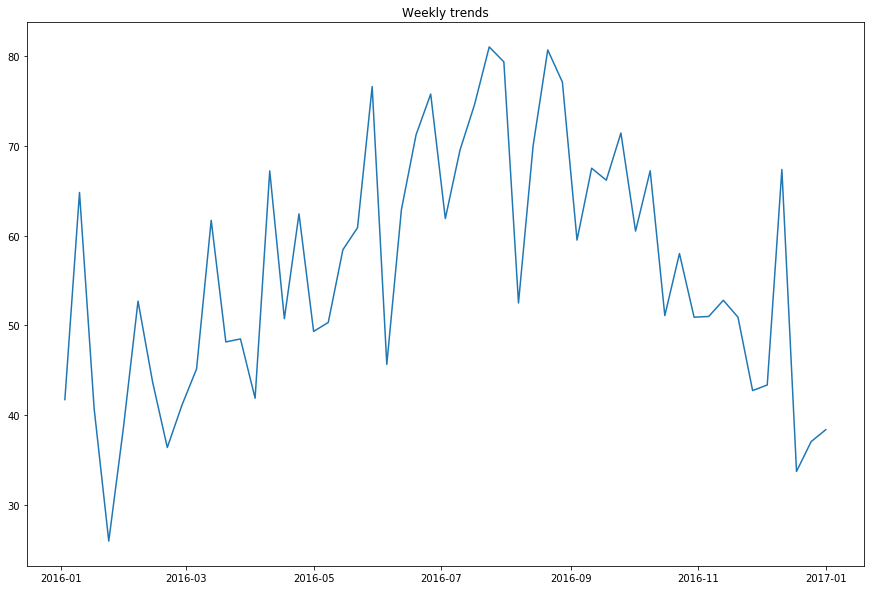

In [27]:
week = temp.resample('W').mean()
plt.plot(week)
plt.title("Weekly trends")

Text(0.5,1,'Monthly Trends')

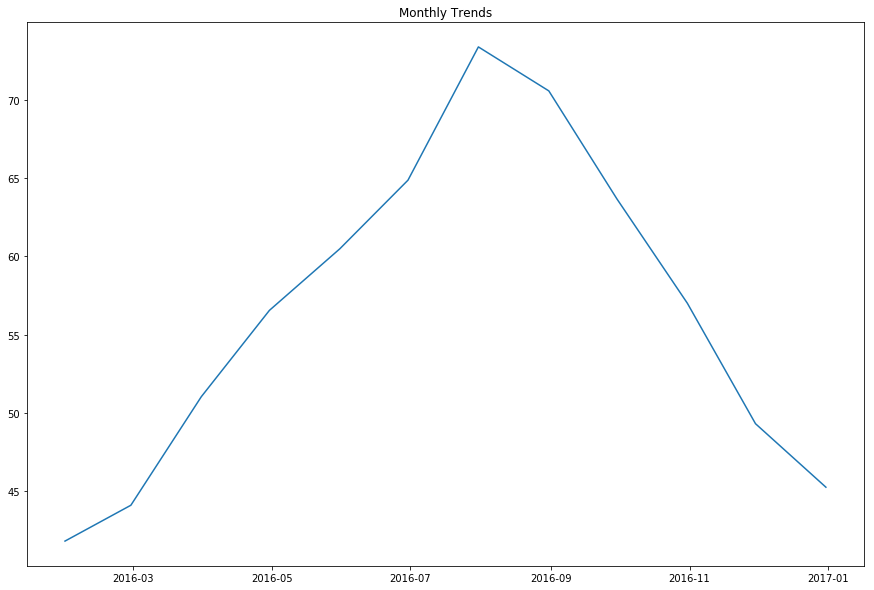

In [28]:
month = temp.resample('M').mean()
plt.plot(month)
plt.title("Monthly Trends")

Text(0.5,1,'Quarter Yearly trends')

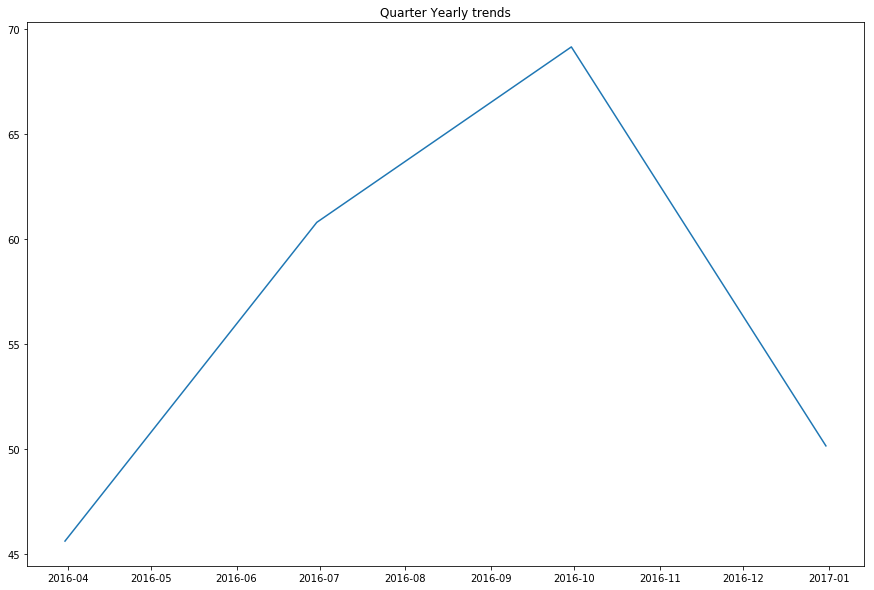

In [29]:
quarter = temp.resample('Q').mean()
plt.plot(quarter)
plt.title("Quarter Yearly trends")

In [30]:
from statsmodels.tsa.stattools import adfuller
def testStationarity(timeSeries):
    rolmean = pd.rolling_mean(timeSeries, window = 12)
    rolstd = pd.rolling_std(timeSeries, window = 12)
    
    original = plt.plot(timeSeries, label = 'Original')
    mean = plt.plot(rolmean, label = 'Rolling mean')
    std = plt.plot(rolstd, label = 'Rolling standard deviation')
    plt.legend(loc = 'best')
    plt.title("Rolling Mean and standard deviation")
    
    #Dickey Fuller Test
    print("Dickey Fuller Test on Data")
    dfTest = adfuller(timeSeries)
    dfOutput = pd.Series(dfTest[0:4], index = ['Test statistic', 'p-value', 'Lags used', 'Observations used'])
    for key, value in dfTest[4].items():
        dfOutput['Critical Value(%s)' %key] = value
    print(dfOutput)

Dickey Fuller Test on Data
Test statistic        -6.715496e+00
p-value                3.590801e-09
Lags used              0.000000e+00
Observations used      2.910000e+02
Critical Value(1%)    -3.453023e+00
Critical Value(5%)    -2.871524e+00
Critical Value(10%)   -2.572090e+00
dtype: float64


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  after removing the cwd from sys.path.


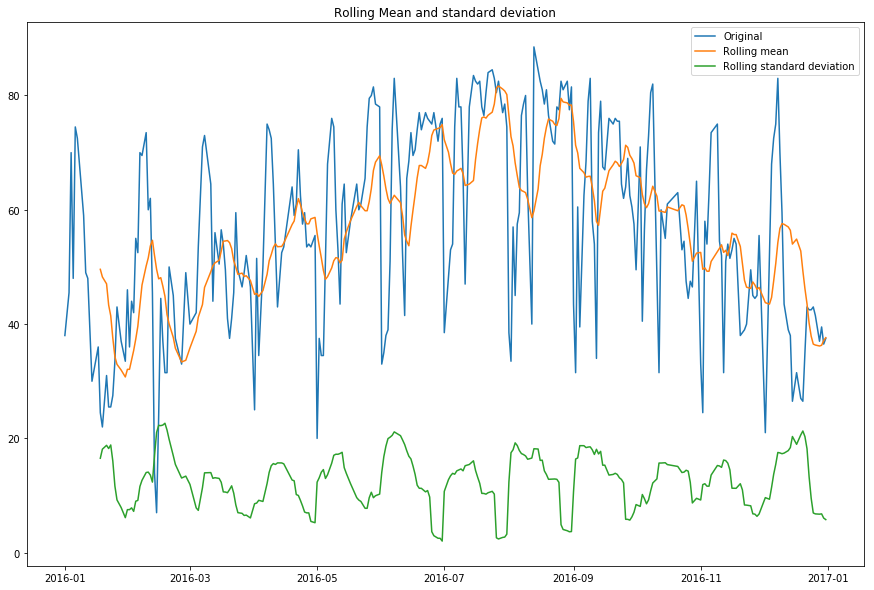

In [31]:
testStationarity(temp)

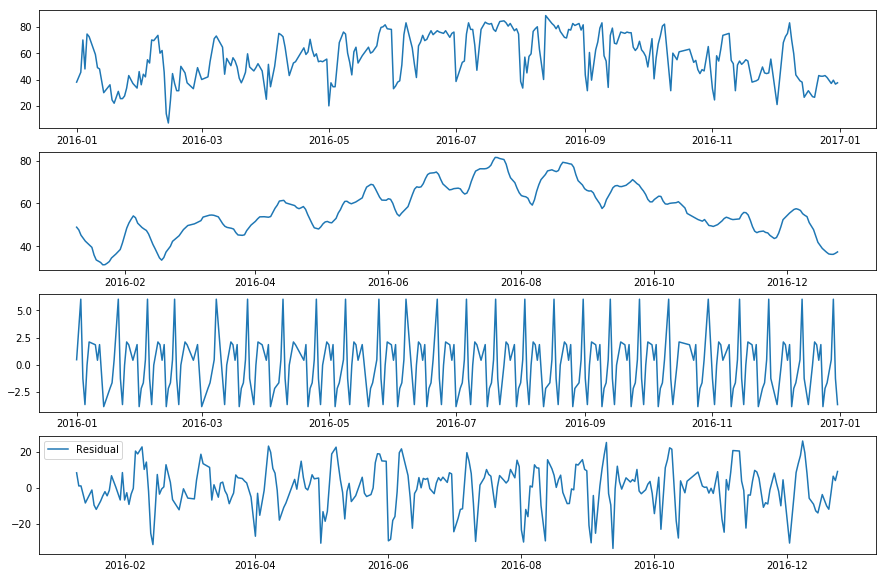

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(temp, freq = 12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(temp, label = 'Original')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

In [33]:
temp_decomposed = residual
temp_decomposed.dropna(inplace = True)
temp_decomposed.head()

date
2016-01-10    8.248037
2016-01-11    0.944218
2016-01-12    0.958975
2016-01-14   -8.534081
2016-01-17   -1.315821
Name: average temperature, dtype: float64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  after removing the cwd from sys.path.


Dickey Fuller Test on Data
Test statistic        -7.389764e+00
p-value                8.058355e-11
Lags used              1.400000e+01
Observations used      2.650000e+02
Critical Value(1%)    -3.455270e+00
Critical Value(5%)    -2.872509e+00
Critical Value(10%)   -2.572615e+00
dtype: float64


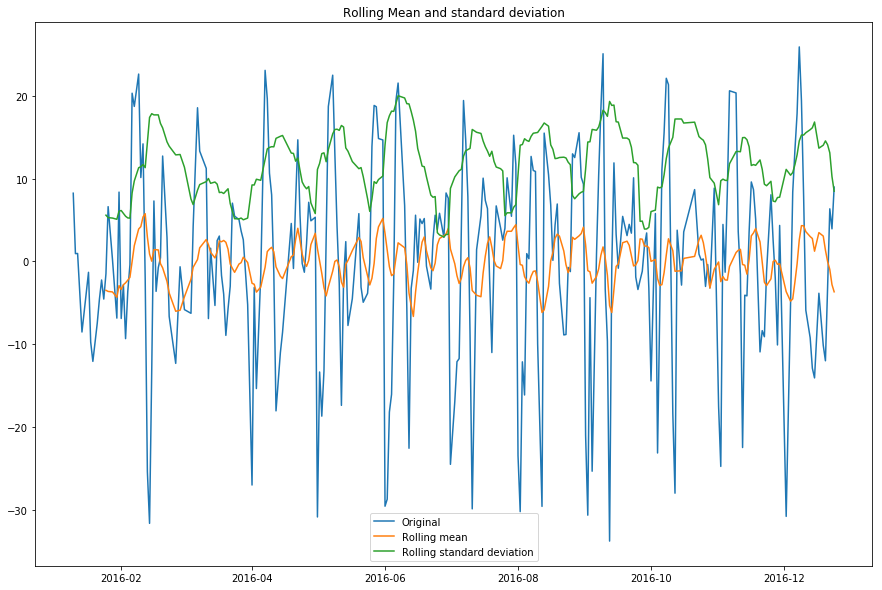

In [34]:
testStationarity(temp_decomposed)

In [35]:
from statsmodels.tsa.stattools import acf, pacf
acf = acf(temp_decomposed, nlags = 20)
pacf = pacf(temp_decomposed, nlags = 20)

Text(0.5,1,'Partial Autocorrelation Function')

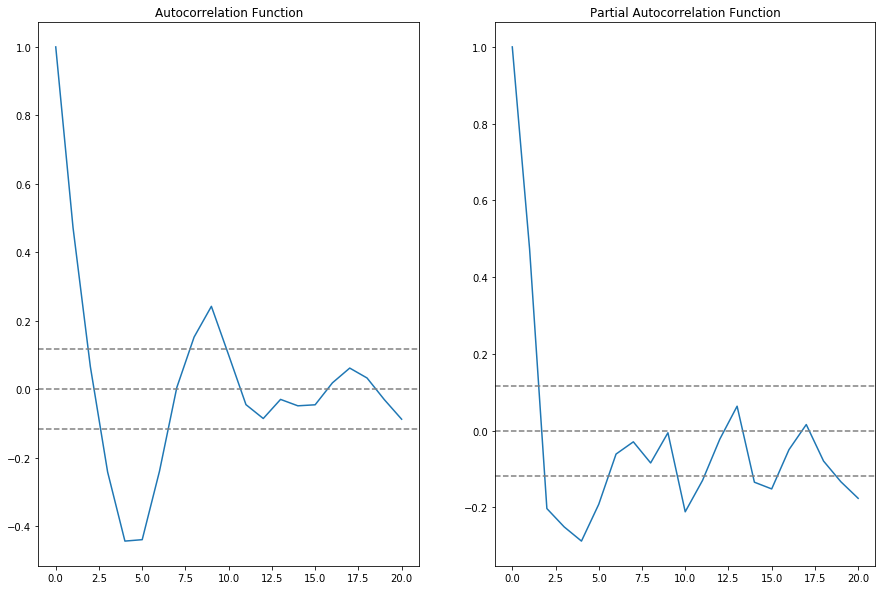

In [36]:
plt.subplot(121)
plt.plot(acf)
plt.axhline(y=0, linestyle = '--', color = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(temp_decomposed)),linestyle = '--', color = 'grey')
plt.axhline(y = 1.96/np.sqrt(len(temp_decomposed)),linestyle = '--', color = 'grey')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf)
plt.axhline(y = 0, linestyle = '--', color = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(temp_decomposed)), linestyle = '--', color = 'grey')
plt.axhline(y = 1.96/np.sqrt(len(temp_decomposed)), linestyle = '--', color = 'grey')
plt.title("Partial Autocorrelation Function")

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


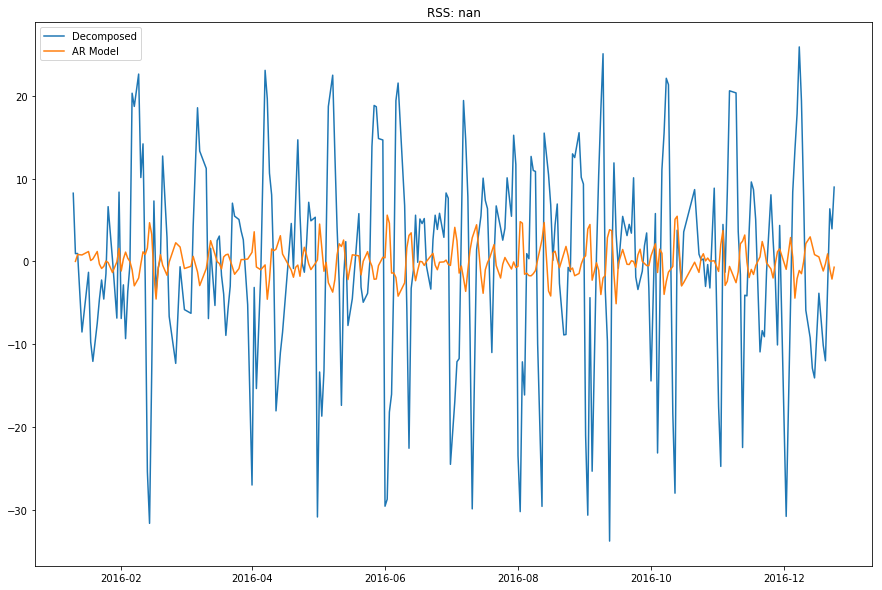

In [37]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(temp_decomposed, order = (2, 1, 0))
results_ar = model.fit(disp = -1)
plt.plot(temp_decomposed, label = 'Decomposed')
plt.plot(results_ar.fittedvalues, label = 'AR Model')
plt.legend(loc = 'best')
plt.title("RSS: %.4f" %sum((results_ar.fittedvalues - temp_decomposed)**2))
plt.legend(loc = 'best')

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: nan')

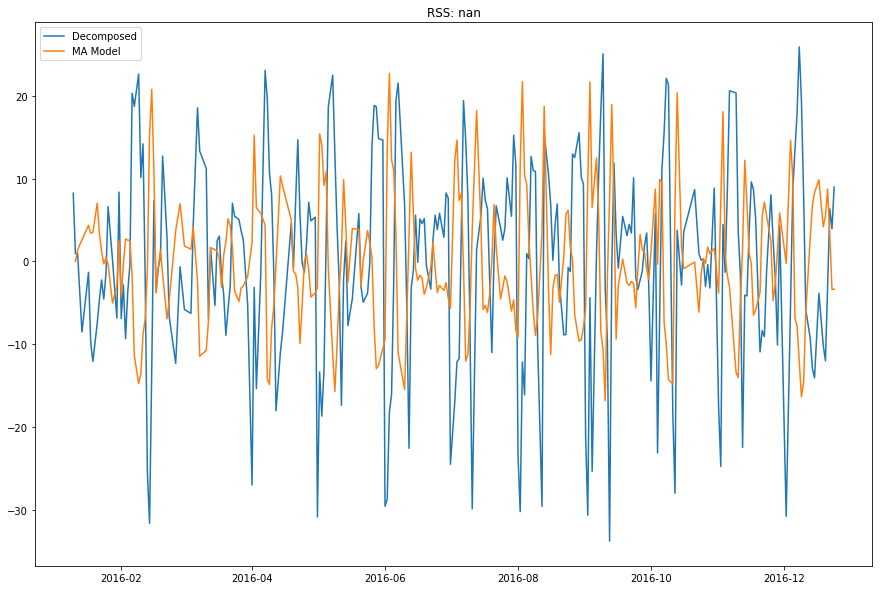

In [38]:
model = ARIMA(temp_decomposed, order = (0, 1, 2))
results_ma = model.fit(disp = -1)
plt.plot(temp_decomposed, label = 'Decomposed')
plt.plot(results_ma.fittedvalues, label = 'MA Model')
plt.legend(loc = 'best')
plt.title("RSS: %.4f" %sum((results_ma.fittedvalues - temp_decomposed)**2))

In [39]:
pred_diff = pd.Series(results_ma.fittedvalues, copy = True)
pred_diff.head()

date
2016-01-11    0.001821
2016-01-12    1.401108
2016-01-14    2.616029
2016-01-17    4.365335
2016-01-18    3.428199
dtype: float64

In [40]:
pred_diff_cumsum = pred_diff.cumsum()
pred_diff_cumsum.dropna(inplace = True)
pred_diff_cumsum.head()

date
2016-01-11     0.001821
2016-01-12     1.402929
2016-01-14     4.018958
2016-01-17     8.384293
2016-01-18    11.812492
dtype: float64

In [41]:
pred = pd.Series(temp.iloc[0], index = temp.index)
pred = pred.add(pred_diff_cumsum, fill_value = 0)
pred.head()

date
2016-01-01    38.0
2016-01-03    38.0
2016-01-04    38.0
2016-01-05    38.0
2016-01-06    38.0
dtype: float64

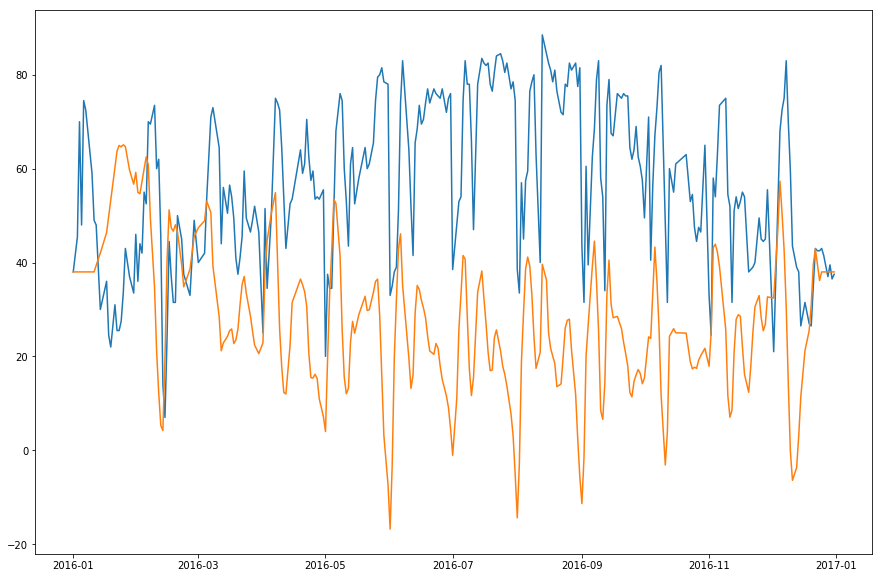

In [42]:
plt.plot(temp)
plt.plot(pred)